In [23]:
import pandas as pd 

In [24]:
train_file_path = r"F:\MachineLearningProject\Project_ML\housing\artifact\data_ingestion\23-07-17-19-04-08\ingested_data\train\housing.csv"

In [25]:
df = pd.read_csv(train_file_path)

In [26]:
df.shape

(16512, 10)

In [27]:
x,y = df.drop(columns=['median_house_value'],axis=1),df[["median_house_value"]]

In [28]:
x.shape

(16512, 9)

In [29]:
y.shape

(16512, 1)

In [30]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.02,35.38,52.0,90.0,35.0,36.0,31.0,0.8054,INLAND
1,-119.80,36.77,52.0,2964.0,512.0,1114.0,486.0,3.8105,INLAND
2,-117.32,33.22,15.0,4784.0,1039.0,1810.0,986.0,2.4375,NEAR OCEAN
3,-117.14,32.70,36.0,633.0,148.0,557.0,139.0,1.5729,NEAR OCEAN
4,-118.14,34.09,20.0,3447.0,1007.0,2622.0,934.0,2.9180,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-118.50,34.24,34.0,2634.0,412.0,1114.0,423.0,5.9401,<1H OCEAN
16508,-117.97,34.05,33.0,1452.0,268.0,1274.0,278.0,3.6563,<1H OCEAN
16509,-118.28,33.97,34.0,2771.0,802.0,2782.0,715.0,1.6652,<1H OCEAN
16510,-118.15,34.07,44.0,1626.0,383.0,1063.0,334.0,2.4348,<1H OCEAN


In [31]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        167
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
numerical_column = x.drop(columns=['ocean_proximity'],axis=1)

In [34]:
numerical_column.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [35]:
simple_imputer = SimpleImputer(strategy='median')

In [36]:
simple_imputer.fit_transform(numerical_column)

array([[-1.1902e+02,  3.5380e+01,  5.2000e+01, ...,  3.6000e+01,
         3.1000e+01,  8.0540e-01],
       [-1.1980e+02,  3.6770e+01,  5.2000e+01, ...,  1.1140e+03,
         4.8600e+02,  3.8105e+00],
       [-1.1732e+02,  3.3220e+01,  1.5000e+01, ...,  1.8100e+03,
         9.8600e+02,  2.4375e+00],
       ...,
       [-1.1828e+02,  3.3970e+01,  3.4000e+01, ...,  2.7820e+03,
         7.1500e+02,  1.6652e+00],
       [-1.1815e+02,  3.4070e+01,  4.4000e+01, ...,  1.0630e+03,
         3.3400e+02,  2.4348e+00],
       [-1.2012e+02,  4.1400e+01,  3.3000e+01, ...,  9.7600e+02,
         4.0300e+02,  2.6062e+00]])

In [37]:
simple_imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2131.    ,  435.    , 1170.5   ,
        410.    ,    3.5409])

In [38]:
simple_imputer = SimpleImputer(strategy='most_frequent')

In [39]:
df['ocean_proximity']

0            INLAND
1            INLAND
2        NEAR OCEAN
3        NEAR OCEAN
4         <1H OCEAN
            ...    
16507     <1H OCEAN
16508     <1H OCEAN
16509     <1H OCEAN
16510     <1H OCEAN
16511        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [40]:
simple_imputer.fit_transform([df['ocean_proximity']])

array([['INLAND', 'INLAND', 'NEAR OCEAN', ..., '<1H OCEAN', '<1H OCEAN',
        'INLAND']], dtype=object)

In [41]:
from sklearn.base import BaseEstimator,TransformerMixin
import numpy as np
from housing.exception import HousingException
import os,sys

In [42]:
COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"



class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise HousingException(e, sys) from e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise HousingException(e, sys) from e




In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [44]:
num_pipeline = Pipeline(steps=[
    ('simple_imputer' , SimpleImputer(strategy='median')),
    ('feature_genrator',FeatureGenerator()),
    ('scaler',StandardScaler())
])

In [45]:
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('oneHotEncoder',OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))
])

In [46]:
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       ]

cat_columns = ['ocean_proximity']

In [47]:
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_columns),
    ('cat_pipeline',cat_pipeline,cat_columns)]
)

In [65]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [63]:
train_df = preprocessor.fit_transform(df)

In [50]:
import dill

In [52]:
with open('preprocessor.pkl',"wb") as pre_file:
    dill.dump(preprocessor,pre_file)

In [54]:
with open('preprocessor.pkl','rb') as file_obj:
    preprocessor_obj = dill.load(file_obj)

In [59]:
test_file_path = r'F:\MachineLearningProject\Project_ML\housing\artifact\data_ingestion\23-07-17-19-04-08\ingested_data\test\housing.csv'

In [84]:
test_df = pd.read_csv(test_file_path)

In [85]:
test_arr = preprocessor_obj.transform(test_df)

In [62]:
from sklearn.linear_model import LinearRegression

In [66]:
x = train_df

In [67]:
x

array([[ 0.27721501, -0.11990105,  1.85959864, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11167112,  0.53161616,  1.85959864, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12478736, -1.13233067, -1.08317474, ...,  0.        ,
         0.        ,  2.98631139],
       ...,
       [ 0.64615827, -0.7807926 ,  0.42797916, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71097263, -0.73392086,  1.22332332, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27121415,  2.70177779,  0.34844474, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
y = np.array(df.median_house_value)
y

array([ 60000.,  87600., 108900., ...,  99000., 220700.,  52600.])

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(x,y)

LinearRegression()

In [72]:
lr.coef_

array([-5.45767854e+04, -5.53588879e+04,  1.38311654e+04, -2.82805147e+03,
        5.54642855e+03, -4.56614633e+04,  4.83323498e+04,  7.42989482e+04,
        6.83760165e+03,  9.07806233e+02,  9.16589709e+03,  2.13321173e+17,
        1.99651109e+17,  6.68267960e+15,  1.35250638e+17,  1.43793086e+17])

In [73]:
y_hat = lr.predict(x)

In [75]:
import matplotlib.pyplot as plt

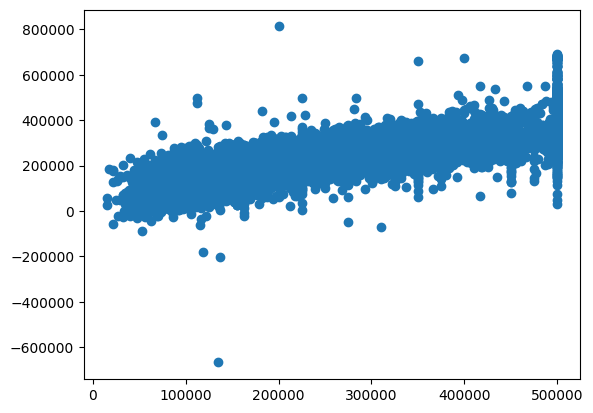

In [76]:
plt.plot(y,y_hat,'o')

In [77]:
from sklearn.metrics import r2_score

In [78]:
r2_score(y,y_hat)

0.6501331420689325

In [82]:
y_hat_test = lr.predict(test_arr)

In [86]:
y_test = np.array(test_df.median_house_value)

In [87]:
r2_score(y_test,y_hat_test)

0.6477726832153646